# Tally α

## Composition

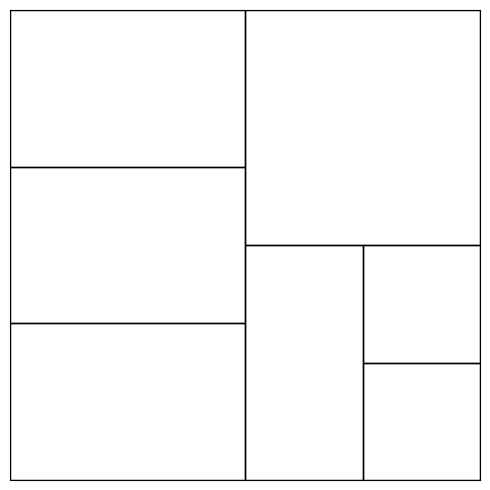

In [1]:
from tally import H, V, e

composition = V(e, e, e) | e & H(e, e & e)

composition.draw()


## Tree

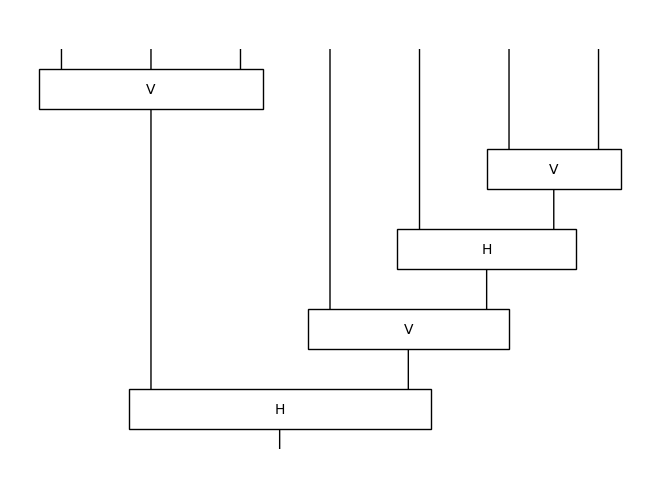

In [2]:
diagram = composition.to_diagram()
diagram.draw()


## Circuit

In [3]:
from numpy.random import rand, seed; seed(42)

from discopy.monoidal import PRO
from discopy.markov import Box, Functor, Category
from discopy.quantum import qubit, Ty, Circuit, Discard, Measure, IQPansatz, Bits

DEPTH = 1

def ansatz(n_qubits, params):
    return IQPansatz(n_qubits, params)\
        >> Discard((n_qubits - 1) // 2) @ qubit @ Discard(n_qubits // 2)

params0 = rand(6)

F = lambda params: Functor(
    ob={PRO(1): qubit},
    ar={Box('H', 3, 1): ansatz(3, params[0:2].reshape(1, 2)),
        Box('V', 3, 1): ansatz(3, params[2:4].reshape(1, 2)),
        Box('H', 2, 1): ansatz(2, params[4:5].reshape(1, 1)),
        Box('V', 2, 1): ansatz(2, params[5:6].reshape(1, 1))},
    cod=Category(Ty, Circuit))

F0 = F(params0)

circuit = F0(diagram) >> Measure() >> Bits(0)[::-1]


In [4]:
import warnings; warnings.filterwarnings("ignore")
from pytket.extensions.qiskit import AerBackend, tk_to_qiskit

tk_to_qiskit(circuit.to_tk()).draw(fold=-1)


┌───┐                                                                                       
q_0: ┤ H ├───────■───────────────────────────────────────────────────────────────────────────────
     ├───┤ ┌─────┴──────┐                   ┌───┐                                             ┌─┐
q_1: ┤ H ├─┤ Rz(4.5993) ├──────■────────────┤ H ├─────────────────────────────────────■───────┤M├
     ├───┤ └────────────┘┌─────┴──────┐     └───┘                                     │       └╥┘
q_2: ┤ H ├───────────────┤ Rz(3.7615) ├───────────────────────────────────────────────┼────────╫─
     ├───┤               └────────────┘                                   ┌───┐┌──────┴──────┐ ║ 
q_3: ┤ H ├────────────────────────────────────────────────────────■───────┤ H ├┤ Rz(0.98029) ├─╫─
     ├───┤                                            ┌───┐┌──────┴──────┐└───┘└─────────────┘ ║ 
q_4: ┤ H ├────────────────────────────────────■───────┤ H ├┤ Rz(0.98014) ├─────────────────────╫─
     ├───┤                   ┌───┐     ┌──────┴──────┐└───┘└─────────────┘                     ║ 
q_5: ┤ H ├───────■───────────┤ H ├─────┤ Rz(0.98029) ├─────────────────────────────────────────╫─
     ├───┤┌──────┴──────┐    └───┘     └─────────────┘                                         ║ 
q_6: ┤ H ├┤ Rz(0.98014) ├──────────────────────────────────────────────────────────────────────╫─
     └───┘└─────────────┘                                                                      ║ 
c: 1/══════════════════════════════════════════════════════════════════════════════════════════╩═
                                                                                               0

In [5]:
backend = AerBackend()

evaluate = lambda F, composition: float((
    F(composition.to_diagram()) >> Measure() >> Bits(0)[::-1]).eval(
        backend=backend, compilation=backend.default_compilation_pass()))

evaluate(F0, composition)


0.4228515625

## Repeat

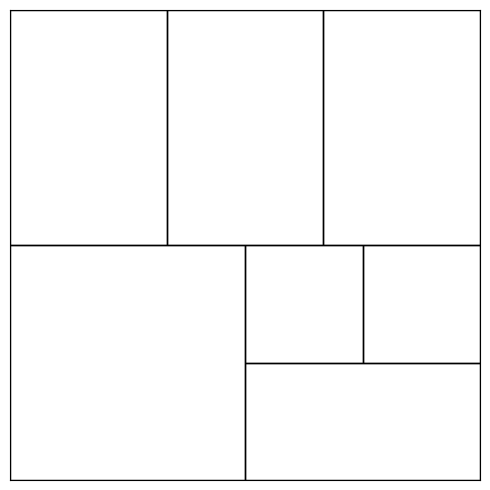

In [6]:
def flip(composition):
    for X, Y in [(H, V), (V, H)]:
        if composition.label is X:
            return Y(*map(flip, composition.terms))
    return composition

flip(composition).draw()


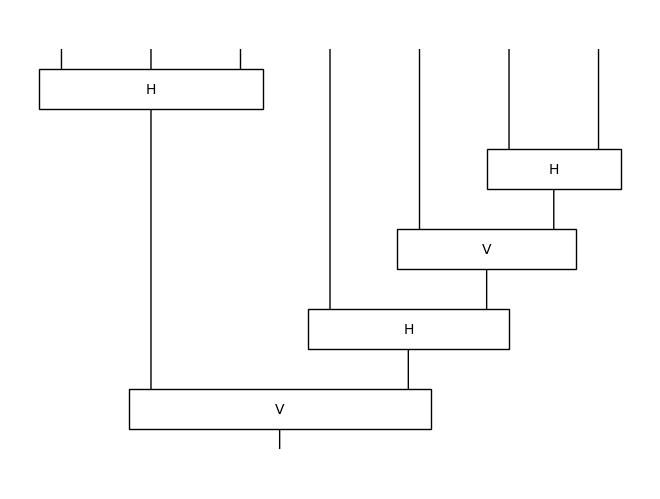

In [7]:
rotate(composition).to_diagram().draw()


In [8]:
circuit2 = F0(flip(composition).to_diagram()) >> Measure()
tk_to_qiskit(circuit2.to_tk()).draw(fold=-1)


┌───┐                                                                                       
q_0: ┤ H ├───────■───────────────────────────────────────────────────────────────────────────────
     ├───┤ ┌─────┴──────┐                   ┌───┐                                             ┌─┐
q_1: ┤ H ├─┤ Rz(2.3533) ├──────■────────────┤ H ├─────────────────────────────────────■───────┤M├
     ├───┤ └────────────┘┌─────┴──────┐     └───┘                                     │       └╥┘
q_2: ┤ H ├───────────────┤ Rz(5.9735) ├───────────────────────────────────────────────┼────────╫─
     ├───┤               └────────────┘                                   ┌───┐┌──────┴──────┐ ║ 
q_3: ┤ H ├────────────────────────────────────────────────────────■───────┤ H ├┤ Rz(0.98014) ├─╫─
     ├───┤                                            ┌───┐┌──────┴──────┐└───┘└─────────────┘ ║ 
q_4: ┤ H ├────────────────────────────────────■───────┤ H ├┤ Rz(0.98029) ├─────────────────────╫─
     ├───┤                   ┌───┐     ┌──────┴──────┐└───┘└─────────────┘                     ║ 
q_5: ┤ H ├───────■───────────┤ H ├─────┤ Rz(0.98014) ├─────────────────────────────────────────╫─
     ├───┤┌──────┴──────┐    └───┘     └─────────────┘                                         ║ 
q_6: ┤ H ├┤ Rz(0.98029) ├──────────────────────────────────────────────────────────────────────╫─
     └───┘└─────────────┘                                                                      ║ 
c: 1/══════════════════════════════════════════════════════════════════════════════════════════╩═
                                                                                               0

In [9]:
evaluate(F0, flip(composition))


0.435546875

### Both compositions have scores around 50%: Tally has no opinion...

### Time to do some learning!

## Learn

### Say that we like our first example, but not its rotation.

In [10]:
data = {composition: 1, flip(composition): 0}


In [11]:
from time import time
import numpy as np
import noisyopt

i, start, losses = 0, time(), []

def callback(params):
    global i
    i += 1
    losses.append(loss(params))
    print("Step {}: {}".format(i, params))

def loss(params):
    return np.mean(np.array([
        (value - evaluate(F(params), composition)) ** 2
        for composition, value in data.items()]))

experiment = noisyopt.minimizeSPSA(
    loss, params0, paired=False, callback=callback, niter=21)
experiment


Step 1: [0.37572392 0.95189811 0.73081014 0.59984229 0.15483483 0.15481071]
Step 2: [0.34239453 0.98522751 0.69748074 0.63317168 0.12150544 0.12148132]
Step 3: [0.28645697 0.92928994 0.64154318 0.57723412 0.06556788 0.06554376]
Step 4: [0.26130525 0.90413823 0.66669489 0.60238584 0.09071959 0.04039204]
Step 5: [0.21265488 0.9527886  0.71534527 0.65103621 0.13936997 0.08904241]
Step 6: [0.14466666 0.88480038 0.64735705 0.58304799 0.07138175 0.15703063]
Step 7: [0.11398004 0.85411376 0.67804366 0.55236137 0.10206836 0.12634402]
Step 8: [0.04309363 0.92500017 0.74893007 0.48147497 0.03118196 0.05545761]
Step 9: [0.02639453 0.90830106 0.73223096 0.46477586 0.01448285 0.07215672]
Step 10: [-0.01016455  0.94486014  0.69567188  0.42821678 -0.02207623  0.03559763]
Step 11: [ 0.02232081  0.91237478  0.72815724  0.39573142 -0.05456159  0.00311228]
Step 12: [ 0.05091347  0.88378212  0.75674991  0.36713876 -0.02596892 -0.02548039]
Step 13: [0.01150605 0.84437469 0.79615733 0.32773133 0.0134385  0.

 message: terminated after reaching max number of iterations
 success: True
     fun: 0.015497207641601562
       x: [ 6.988e-02  8.819e-01  8.545e-01  1.921e-01 -8.077e-02
            1.348e-01]
     nit: 21
    nfev: 42

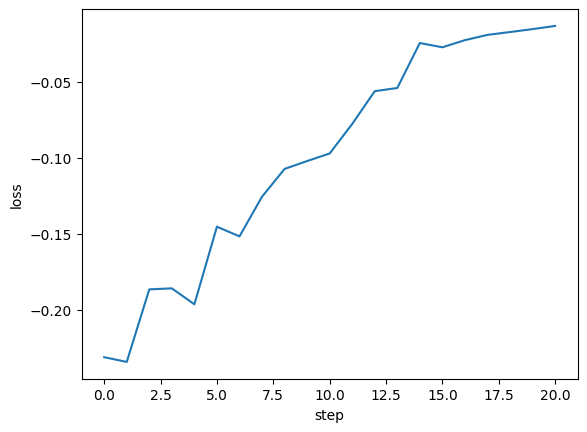

In [12]:
import matplotlib.pyplot as plt

plt.draw(-np.array(losses))
plt.xlabel('step')
plt.ylabel('loss')
plt.show()


In [13]:
{c: evaluate(F(experiment.x), c) for c in data}


{(V(e, e, e) | e & (e | e & e)): 0.828125,
 H(e, e, e) & (e | e & (e | e)): 0.0576171875}

### Tally's score have come close enough to our human judgement...

### Our first quantum drawing experiment is a success!